<a href="https://colab.research.google.com/github/coder-penguin/ML/blob/master/tutorial/scikit_learn_tutorial_ensamble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sample code for emsamble learning

Load libraries

In [1]:
!pip install catboost

     |████████████████████████████████| 64.8MB 58kB/s 


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.externals import joblib

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


Read data

In [0]:
# read the breast cancer wisconsin dataset
dataset = load_breast_cancer()

In [4]:
#30 features
dataset['data'].shape

(569, 30)

In [5]:
#binary target
dataset['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [6]:
dataset['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [7]:
dataset['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

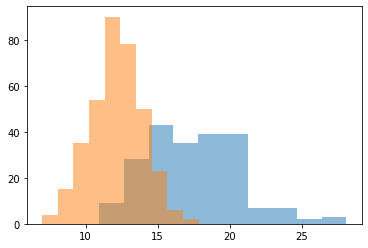

In [8]:
# show data
plt.hist(dataset['data'][:, 0][dataset['target']==0], label=dataset['target_names'][0], alpha=0.5)
plt.hist(dataset['data'][:, 0][dataset['target']==1], label=dataset['target_names'][1], alpha=0.5)
plt.show()

In [0]:
# image(numpy.ndarray)
X = dataset.data

# label(numpy.ndarray)
y = dataset.target

In [0]:
#split dataset to train and test dataset
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=True)#default is True

In [11]:
print(len(X_train), len(X_test))
print(len(y_train), len(y_test))

455 114
455 114


In [0]:
df = pd.DataFrame(data=X_train, columns=dataset.feature_names)

In [0]:
df['target'] = y_train

In [14]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,9.465,21.01,60.11,269.4,0.10440,0.07773,0.02172,0.015040,0.1717,0.06899,0.2351,2.0110,1.660,14.20,0.010520,0.017550,0.01714,0.009333,0.02279,0.004237,10.41,31.56,67.03,330.7,0.15480,0.1664,0.09412,0.06517,0.2878,0.09211,1
1,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.093530,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.035020,0.03553,0.012260,0.02143,0.003749,15.49,30.73,106.20,739.3,0.17030,0.5401,0.53900,0.20600,0.4378,0.10720,0
2,13.880,16.16,88.37,596.6,0.07026,0.04831,0.02045,0.008507,0.1607,0.05474,0.2541,0.6218,1.709,23.12,0.003728,0.014150,0.01988,0.007016,0.01647,0.001970,15.51,19.97,99.66,745.3,0.08484,0.1233,0.10910,0.04537,0.2542,0.06623,1
3,17.140,16.40,116.00,912.7,0.11860,0.22760,0.22290,0.140100,0.3040,0.07413,1.0460,0.9760,7.276,111.40,0.008029,0.037990,0.03732,0.023970,0.02308,0.007444,22.25,21.40,152.40,1461.0,0.15450,0.3949,0.38530,0.25500,0.4066,0.10590,0
4,11.810,17.39,75.27,428.9,0.10070,0.05562,0.02353,0.015530,0.1718,0.05780,0.1859,1.9260,1.011,14.47,0.007831,0.008776,0.01556,0.006240,0.03139,0.001988,12.57,26.48,79.57,489.5,0.13560,0.1000,0.08803,0.04306,0.3200,0.06576,1


In [15]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,13.949829,19.378593,90.752813,636.499780,0.096400,0.103433,0.085991,0.048020,0.181190,0.062986,0.395161,1.227655,2.790056,38.041633,0.007133,0.025259,0.030894,0.011696,0.020586,0.003832,16.082543,25.835714,105.919275,858.163956,0.132519,0.250759,0.264544,0.112931,0.289457,0.084141,0.635165
std,3.396307,4.432210,23.315249,325.515209,0.013979,0.050795,0.074377,0.037563,0.026977,0.007030,0.232595,0.542876,1.668217,33.434218,0.003064,0.017006,0.026189,0.005998,0.007820,0.002523,4.699460,6.301683,32.470644,536.772152,0.022931,0.151767,0.201333,0.064673,0.059355,0.017715,0.481914
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.050240,0.111500,0.360200,0.771400,6.802000,0.001713,0.002252,0.000000,0.000000,0.009539,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156600,0.055210,0.000000
25%,11.555000,16.175000,74.095000,408.900000,0.086475,0.065090,0.029035,0.020220,0.162450,0.058220,0.234450,0.856100,1.604000,17.850000,0.005225,0.013425,0.014900,0.007605,0.015210,0.002275,12.835000,21.260000,83.180000,504.300000,0.117150,0.143600,0.110900,0.063255,0.250400,0.072090,0.000000
50%,13.210000,18.900000,85.420000,538.400000,0.096760,0.092630,0.059400,0.032510,0.179700,0.061710,0.327600,1.143000,2.287000,24.440000,0.006471,0.020520,0.025750,0.010760,0.018970,0.003288,14.800000,25.480000,96.690000,674.700000,0.131200,0.215800,0.224100,0.098150,0.281800,0.080200,1.000000
75%,15.740000,21.860000,103.650000,767.600000,0.105350,0.129750,0.130000,0.074490,0.195650,0.066395,0.480700,1.478500,3.297500,45.170000,0.008262,0.032295,0.041615,0.014685,0.023560,0.004565,18.800000,30.200000,125.500000,1086.000000,0.146050,0.325200,0.378500,0.161100,0.317750,0.092100,1.000000
max,25.730000,39.280000,174.200000,2010.000000,0.163400,0.311400,0.352300,0.191300,0.304000,0.095750,1.370000,4.885000,11.070000,224.100000,0.031130,0.106400,0.303800,0.040900,0.061460,0.022860,33.130000,49.540000,229.300000,3432.000000,0.222600,1.058000,1.252000,0.290300,0.577400,0.207500,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0ab9417668>,
      dtype=object)

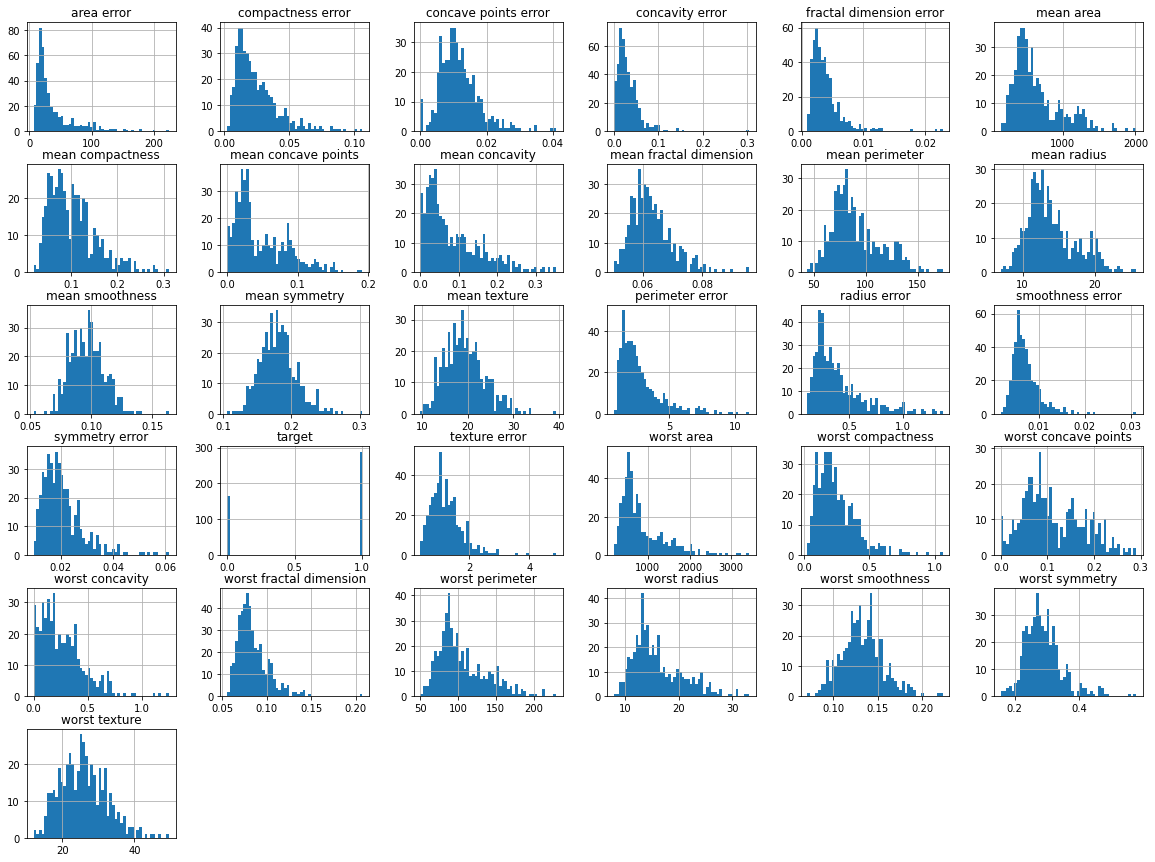

In [16]:
# show data
df.hist(bins=50, figsize=(20,15))

In [0]:
#standard correlation coefficient
corr_mx = df.corr()

In [18]:
corr_mx['target'].sort_values(ascending=False)

target                     1.000000
smoothness error           0.111301
symmetry error             0.060906
texture error              0.042467
mean fractal dimension     0.024130
fractal dimension error   -0.064645
compactness error         -0.268037
concavity error           -0.273571
worst fractal dimension   -0.329428
mean symmetry             -0.329451
mean smoothness           -0.356339
mean texture              -0.402327
concave points error      -0.404389
worst smoothness          -0.409440
worst symmetry            -0.433887
worst texture             -0.452226
perimeter error           -0.597596
mean compactness          -0.600498
worst compactness         -0.602375
radius error              -0.608173
area error                -0.661557
worst concavity           -0.676831
mean concavity            -0.726467
mean area                 -0.740708
mean radius               -0.748376
worst area                -0.759336
mean perimeter            -0.762379
worst radius              -0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0ab8c28b70>,
      dtype=object)

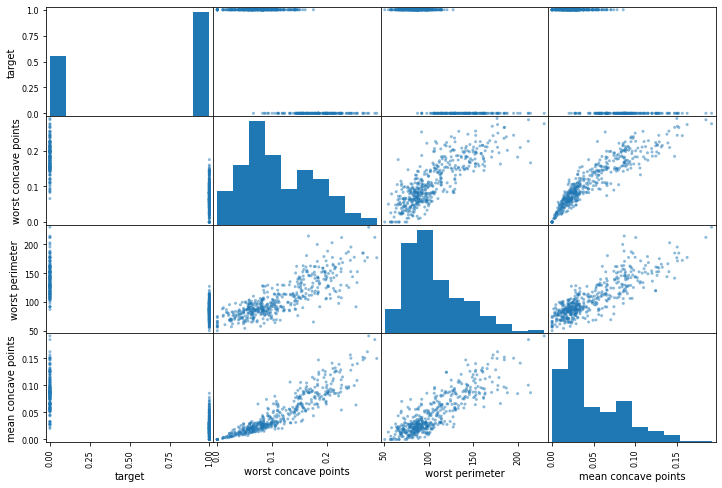

In [19]:
attributes = ['target', 'worst concave points', 'worst perimeter', 'mean concave points']
pd.plotting.scatter_matrix(df[attributes], figsize=(12, 8))

In [0]:
scaler = StandardScaler()
X_train_processed = scaler.fit_transform(X_train)
X_test_processed = scaler.transform(X_test)

In [0]:
def kth_cross_validation(model):
   #k-th cross validation
   cv = 3 #the number of foldings
   scores = cross_val_score(model, X_train_processed, y_train, cv=cv, scoring='accuracy')
   return scores

###Voting

In [0]:
models = [('decision tree', DecisionTreeClassifier()),
                ('random forest' , RandomForestClassifier()),
                ('extra trees' , ExtraTreesClassifier()),
                ('gradient boosting' , GradientBoostingClassifier()),
                ('xgboost' , XGBClassifier()),
                ('catboost' , CatBoostClassifier(verbose=False))]

In [0]:
def vote(models, voting='hard'):
   vc = VotingClassifier(estimators=models, voting=voting)
   for model in models:
     scores = kth_cross_validation(model[1])
     print(model[0], scores.mean())
   print('voting ' + voting, kth_cross_validation(vc).mean())

In [32]:
vote(models, voting='hard')

decision tree 0.9318868362960381
random forest 0.9648251423260138
extra trees 0.9692401533635412
gradient boosting 0.9494452190077842
xgboost 0.956009643313582
catboost 0.9714476588823051
voting hard 0.9670326478447775


In [33]:
vote(models, voting='soft')

decision tree 0.9318577901707913
random forest 0.960410131288486
extra trees 0.9780411293133496
gradient boosting 0.9494452190077842
xgboost 0.956009643313582
catboost 0.9714476588823051
voting soft 0.9626321598698734


###Bagging/Pasting

In [0]:
def bag(model, option='bagging'):
    if option == 'bagging':
       bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, bootstrap=True, oob_score=True)
       bagging.fit(X_train_processed, y_train)
       score = bagging.oob_score_
       print(option, score)
    elif option == 'pasting':
       bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, bootstrap=False)
       scores = kth_cross_validation(bagging)
       print(option, scores.mean())
    elif option == 'random patch':
       bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, bootstrap=True, max_samples=0.8, oob_score=True)
       bagging.fit(X_train_processed, y_train)
       score = bagging.oob_score_
       print(option, score)
    elif option == 'random subspace':
       bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, bootstrap=False, max_samples=0.8)
       scores = kth_cross_validation(bagging)
       print(option, scores.mean())

In [35]:
bag(DecisionTreeClassifier(),option='bagging')

bagging 0.9582417582417583


In [36]:
bag(DecisionTreeClassifier(),option='pasting')

pasting 0.9296502846520275


In [37]:
bag(DecisionTreeClassifier(),option='random patch')

random patch 0.9626373626373627


In [38]:
bag(DecisionTreeClassifier(),option='random subspace')

random subspace 0.9472812826768909


###Stacking

In [0]:
def stack(models):
   X_train1, X_train2, y_train1, y_train2 = train_test_split(X_train_processed, y_train, test_size=0.5)

   y_train2_pred = []
   y_test_pred = []
   for model in models:
     model[1].fit(X_train1, y_train1)  
     y_train2_pred.append(model[1].predict(X_train2))
     y_test_pred.append(model[1].predict(X_test_processed))
  
   y_train2_pred = np.array(y_train2_pred)
   blender = DecisionTreeClassifier()
   blender.fit(y_train2_pred.transpose(), y_train2)

   y_test_pred = np.array(y_test_pred)
   y_test_pred = blender.predict(y_test_pred.transpose())
   score = accuracy_score(y_test, y_test_pred)
   print('stacking', score)

In [40]:
stack(models)

stacking 0.9385964912280702
